   country  year     sex          age  suicides_no  population  \
0  Albania  1987    male  15-24 years           21      312900   
1  Albania  1987    male  35-54 years           16      308000   
2  Albania  1987  female  15-24 years           14      289700   
3  Albania  1987    male    75+ years            1       21800   
4  Albania  1987    male  25-34 years            9      274300   

   suicides/100k pop country-year  HDI for year  gdp_for_year ($)   \
0               6.71  Albania1987           NaN      2,156,624,900   
1               5.19  Albania1987           NaN      2,156,624,900   
2               4.83  Albania1987           NaN      2,156,624,900   
3               4.59  Albania1987           NaN      2,156,624,900   
4               3.28  Albania1987           NaN      2,156,624,900   

   gdp_per_capita ($)       generation  
0                 796     Generation X  
1                 796           Silent  
2                 796     Generation X  
3                 

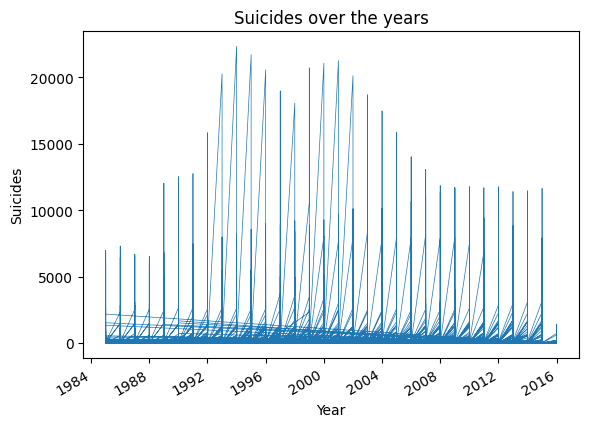

ValueError: Could not interpret value `gdp_per_capita` for `y`. An entry with this name does not appear in `data`.

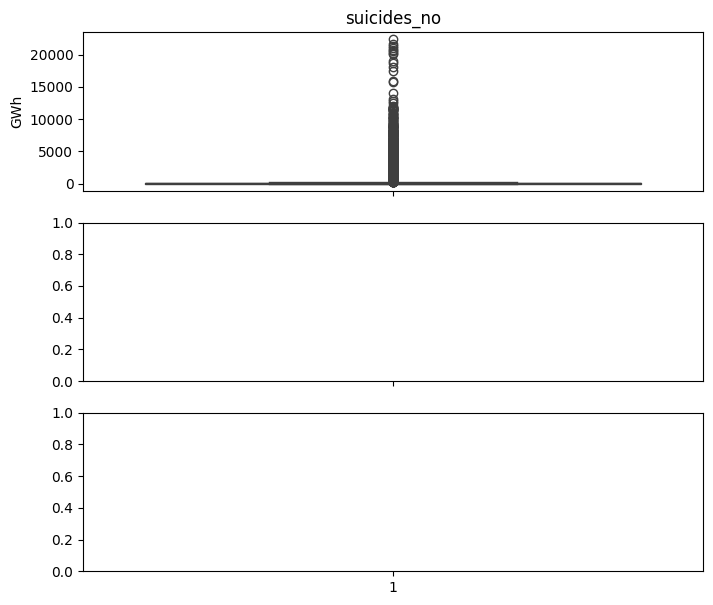

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset from the provided URL
url = 'https://raw.githubusercontent.com/salemprakash/EDA/main/Data/Suicide%20data.csv'
df = pd.read_csv(url)

# Display the first few rows of the dataset to understand its structure
print(df.head())

# Check the columns to understand if there's a 'Date' or similar time-based column
print(df.columns)

# Suppose we have a 'year' column, we convert it into a DateTime index for time series analysis
# If 'year' column does not exist, replace it with a column that makes sense from your data
df['Date'] = pd.to_datetime(df['year'], format='%Y')  # Adjust this based on your dataset

# Now, set the Date column as index
df = df.set_index('Date')

# Check the data types of columns to ensure the Date column is datetime
print(df.dtypes)

# Add Year, Month, and Weekday Name columns for further analysis
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Weekday Name'] = df.index.day_name()

# Check a sample of data to verify the new columns
print(df.sample(5, random_state=0))

# Time-based indexing: Extract data for a specific year, let's say 2010
df_2010 = df.loc['2010']

# Visualize the time series data of a specific column (e.g., 'suicides_no')
df['suicides_no'].plot(linewidth=0.5)
plt.title('Suicides over the years')
plt.ylabel('Suicides')
plt.xlabel('Year')
plt.show()

# Group by month and visualize the distribution using box plots
fig, axes = plt.subplots(3, 1, figsize=(8, 7), sharex=True)
for name, ax in zip(['suicides_no', 'gdp_per_capita', 'population'], axes):
    sns.boxplot(data=df, x='Month', y=name, ax=ax)
    ax.set_ylabel('GWh')  # Adjust units based on your columns
    ax.set_title(name)
    if ax != axes[-1]:
        ax.set_xlabel('')

# Resample data to a weekly mean (if your data has daily information, otherwise adjust)
power_weekly_mean = df.resample('W').mean()

# Plot resampled data
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df['suicides_no'], marker='o', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(power_weekly_mean['suicides_no'], marker='X', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.set_ylabel('Suicide Numbers')
ax.legend()
plt.title('Suicide Rate: Daily vs Weekly Mean')
plt.show()

# Add any additional analysis or visualizations as needed
